In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_full = pd.read_csv('/mnt/processed/private/msds2022/lt10/lfb_clean.csv',
                 low_memory=False)

In [4]:
df_fa = df_full[(df_full.IncidentGroup == "False Alarm") & (df_full.CalYear == 2017)]

df_fa.head(5)

,DateOfCall,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,IncGeo_BoroughCode,...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
1,2017-01-01,2017,1,False Alarm,False alarm - Good intent,Dwelling,House - single occupancy,Correct incident location,E15,E09000025,...,7.2,3.4,27.6,7.6,193,Lab,0,100,0,40.5
4,2017-01-01,2017,22,False Alarm,AFA,Dwelling,House - single occupancy,Correct incident location,E15,E09000025,...,7.2,3.4,27.6,7.6,193,Lab,0,100,0,40.5
18,2017-01-02,2017,18,False Alarm,AFA,Other Residential,Retirement/Old Persons Home,Correct incident location,E6,E09000025,...,7.2,3.4,27.6,7.6,193,Lab,0,100,0,40.5
21,2017-01-03,2017,5,False Alarm,False alarm - Malicious,Dwelling,House - single occupancy,Correct incident location,E15,E09000025,...,7.2,3.4,27.6,7.6,193,Lab,0,100,0,40.5
24,2017-01-03,2017,16,False Alarm,False alarm - Good intent,Outdoor,Road surface/pavement,On motorway / elevated road,E13,E09000025,...,7.2,3.4,27.6,7.6,193,Lab,0,100,0,40.5


In [5]:
df_afa = df_fa[df_fa.StopCodeDescription == "AFA"]
df_good = df_fa[df_fa.StopCodeDescription == "False alarm - Good intent"]
df_bad = df_fa[df_fa.StopCodeDescription == "False alarm - Malicious"]


In [6]:
inn_out = pd.pivot_table(df_fa,values='DateOfCall', index='CalYear', columns='Inner/_Outer_London', aggfunc=len)
inn_out['%_of_Inner'] = inn_out['Inner London']/(inn_out['Inner London'] + inn_out['Outer London'])
inn_out['%_of_Outer'] = inn_out['Outer London']/(inn_out['Inner London'] + inn_out['Outer London'])

inn_out

Inner/_Outer_London,Inner London,Outer London,%_of_Inner,%_of_Outer
CalYear,,,,
2017,28454,23273,0.55008,0.44992


In [7]:
# Inner London FAs

pd.pivot_table(df_fa[df_fa['Inner/_Outer_London']=='Inner London']
                         , values='DateOfCall'
                         , index='CalYear'
                         , columns='StopCodeDescription'
                         , aggfunc=len)


StopCodeDescription,AFA,False alarm - Good intent,False alarm - Malicious
CalYear,,,
2017,22565,5208,681


In [8]:
# Outer London FAs

pd.pivot_table(df_fa[df_fa['Inner/_Outer_London']=='Outer London']
                         , values='DateOfCall'
                         , index='CalYear'
                         , columns='StopCodeDescription'
                         , aggfunc=len)

StopCodeDescription,AFA,False alarm - Good intent,False alarm - Malicious
CalYear,,,
2017,16481,6153,639


In [132]:
# Per Borough - Inland Area - per year

pd.pivot_table(df_fa
               , values='DateOfCall'
               , index=['ProperCase', 'Inland_Area_(Hectares)']
               , columns='CalYear'
               , aggfunc=len)

,CalYear,2017
ProperCase,Inland_Area_(Hectares),
Barking And dagenham,"3,611",854
Barnet,"8,675",1800
Bexley,"6,058",1041
Brent,"4,323",1450
Bromley,"15,013",1244
Camden,"2,179",2935
City Of london,290,967
Croydon,"8,650",1648
Ealing,"5,554",1761


In [133]:
# per land area

df_land = df_fa.groupby(['ProperCase', 'Inland_Area_(Hectares)'], as_index=False)['DateOfCall'].count()
df_land.columns = ['Borough', 'LandArea', 'Incidents']
df_land


,Borough,LandArea,Incidents
0,Barking And dagenham,"3,611",854
1,Barnet,"8,675",1800
2,Bexley,"6,058",1041
3,Brent,"4,323",1450
4,Bromley,"15,013",1244
5,Camden,"2,179",2935
6,City Of london,290,967
7,Croydon,"8,650",1648
8,Ealing,"5,554",1761
9,Enfield,"8,083",1288


In [9]:
# Per Borough - Pop % born abroad - per year

pd.pivot_table(df_fa
               , values='DateOfCall'
               , index=['ProperCase', '%_of_resident_population_born_abroad_(2015)']
               , columns='CalYear'
               , aggfunc=len)


,CalYear,2017
ProperCase,%_of_resident_population_born_abroad_(2015),
Barking And dagenham,37.8,854
Barnet,35.2,1800
Bexley,16.1,1041
Brent,53.9,1450
Bromley,18.3,1244
Camden,41.4,2935
City Of london,.,967
Croydon,29.4,1648
Ealing,47.4,1761


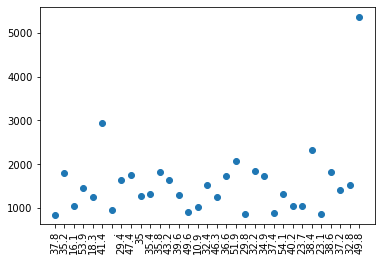

In [10]:
# by % of population born abroad

df_abr = df_fa.groupby(['ProperCase', '%_of_resident_population_born_abroad_(2015)'],
              as_index=False)['DateOfCall'].count()
df_abr.columns = ['Borough', 'popn_born_abroad_15', 'Incidents']

plt.scatter(df_abr.popn_born_abroad_15, df_abr.Incidents)
plt.xticks(rotation=90)
plt.show()


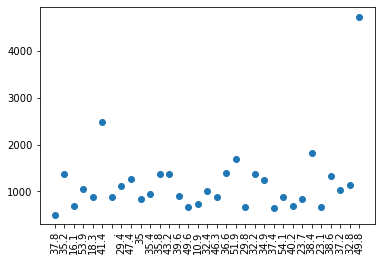

In [11]:
df_abr = df_afa.groupby(['ProperCase'
            , '%_of_resident_population_born_abroad_(2015)']
            , as_index=False)['DateOfCall'].count()
df_abr.columns = ['Borough', 'popn_born_abroad_15', 'Incidents']

plt.scatter(df_abr.popn_born_abroad_15, df_abr.Incidents)
plt.xticks(rotation=90)
plt.show()

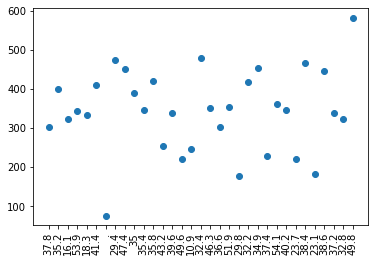

In [12]:
df_abr = df_good.groupby(['ProperCase'
            , '%_of_resident_population_born_abroad_(2015)']
            , as_index=False)['DateOfCall'].count()
df_abr.columns = ['Borough', 'popn_born_abroad_15', 'Incidents']

plt.scatter(df_abr.popn_born_abroad_15, df_abr.Incidents)
plt.xticks(rotation=90)
plt.show()

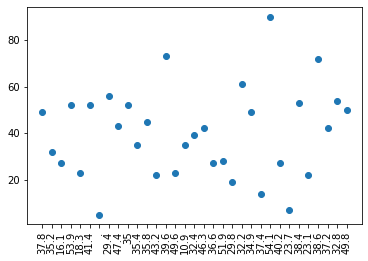

In [13]:
df_abr = df_bad.groupby(['ProperCase'
            , '%_of_resident_population_born_abroad_(2015)']
            , as_index=False)['DateOfCall'].count()
df_abr.columns = ['Borough', 'popn_born_abroad_15', 'Incidents']

plt.scatter(df_abr.popn_born_abroad_15, df_abr.Incidents)
plt.xticks(rotation=90)
plt.show()

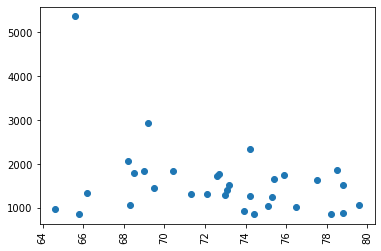

In [14]:
# by employment rate
df_emp = df_fa.groupby(['ProperCase', 'Employment_rate_(%)_(2015)'],
              as_index=False)['DateOfCall'].count()
df_emp.columns = ['Borough', 'employment_rate_15', 'Incidents']

plt.scatter(df_emp.employment_rate_15, df_emp.Incidents)
plt.xticks(rotation=90)
plt.show()

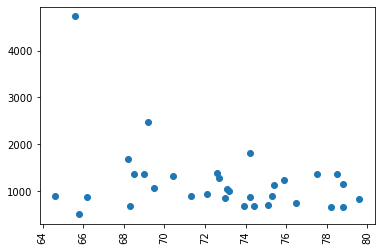

In [15]:
# by employment rate
df_emp = df_afa.groupby(['ProperCase', 'Employment_rate_(%)_(2015)'],
              as_index=False)['DateOfCall'].count()
df_emp.columns = ['Borough', 'employment_rate_15', 'Incidents']

plt.scatter(df_emp.employment_rate_15, df_emp.Incidents)
plt.xticks(rotation=90)
plt.show()

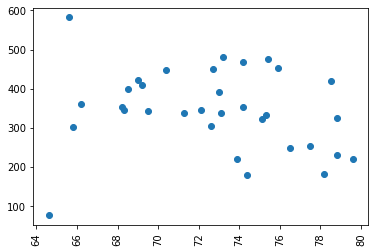

In [16]:
# by employment rate
df_emp = df_good.groupby(['ProperCase', 'Employment_rate_(%)_(2015)'],
              as_index=False)['DateOfCall'].count()
df_emp.columns = ['Borough', 'employment_rate_15', 'Incidents']

plt.scatter(df_emp.employment_rate_15, df_emp.Incidents)
plt.xticks(rotation=90)
plt.show()

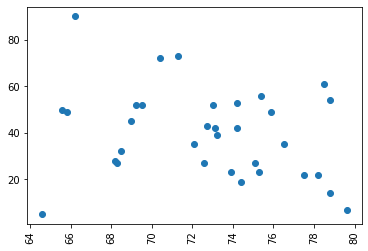

In [17]:
# by employment rate
df_emp = df_bad.groupby(['ProperCase', 'Employment_rate_(%)_(2015)'],
              as_index=False)['DateOfCall'].count()
df_emp.columns = ['Borough', 'employment_rate_15', 'Incidents']

plt.scatter(df_emp.employment_rate_15, df_emp.Incidents)
plt.xticks(rotation=90)
plt.show()

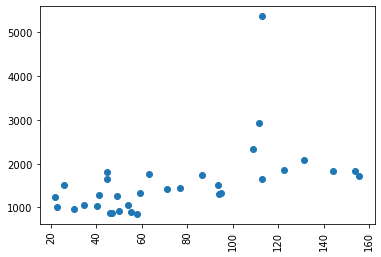

In [18]:
# by popn density
df_popden = df_fa.groupby(['ProperCase', 'Population_density_(per_hectare)_2017'],
              as_index=False)['DateOfCall'].count()
df_popden.columns = ['Borough', 'popn_density_17', 'Incidents']

plt.scatter(df_popden.popn_density_17, df_popden.Incidents)
plt.xticks(rotation=90)
plt.show()

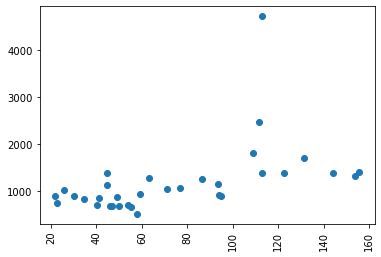

In [19]:
# by popn density
df_popden = df_afa.groupby(['ProperCase', 'Population_density_(per_hectare)_2017'],
              as_index=False)['DateOfCall'].count()
df_popden.columns = ['Borough', 'popn_density_17', 'Incidents']

plt.scatter(df_popden.popn_density_17, df_popden.Incidents)
plt.xticks(rotation=90)
plt.show()

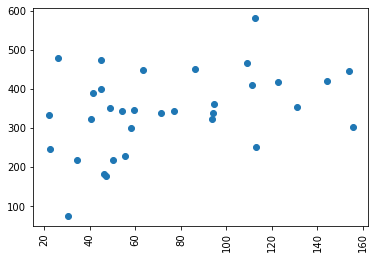

In [20]:
# by popn density
df_popden = df_good.groupby(['ProperCase', 'Population_density_(per_hectare)_2017'],
              as_index=False)['DateOfCall'].count()
df_popden.columns = ['Borough', 'popn_density_17', 'Incidents']

plt.scatter(df_popden.popn_density_17, df_popden.Incidents)
plt.xticks(rotation=90)
plt.show()

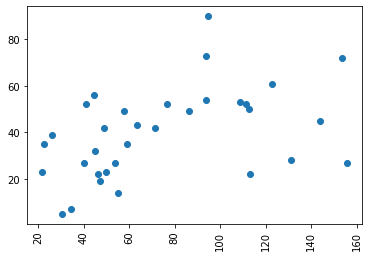

In [21]:
# by popn density
df_popden = df_bad.groupby(['ProperCase', 'Population_density_(per_hectare)_2017'],
              as_index=False)['DateOfCall'].count()
df_popden.columns = ['Borough', 'popn_density_17', 'Incidents']

plt.scatter(df_popden.popn_density_17, df_popden.Incidents)
plt.xticks(rotation=90)
plt.show()